In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
oil = pd.read_csv("../retail/oil.csv")

# Assignment 1: Simple Line Chart

Build a simple line plot for the oil series. Are there any interesting patterns here? 

What happened in 2014 to oil price?

In [3]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


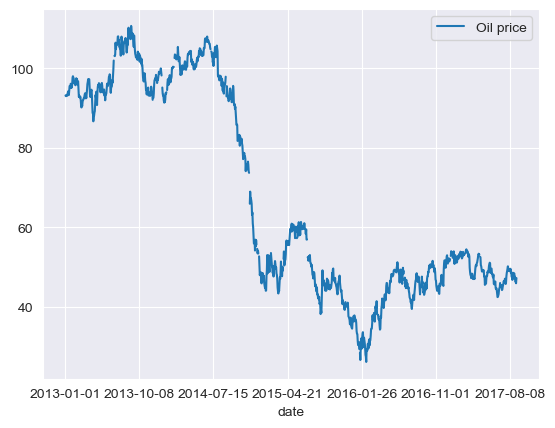

In [70]:
oil.set_index("date").plot();

#try the above statement without ; or with semicolon in the end

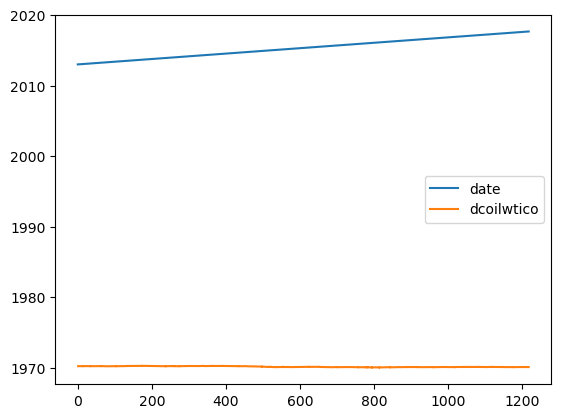

In [5]:
oil.astype({"date":"datetime64"}).plot();

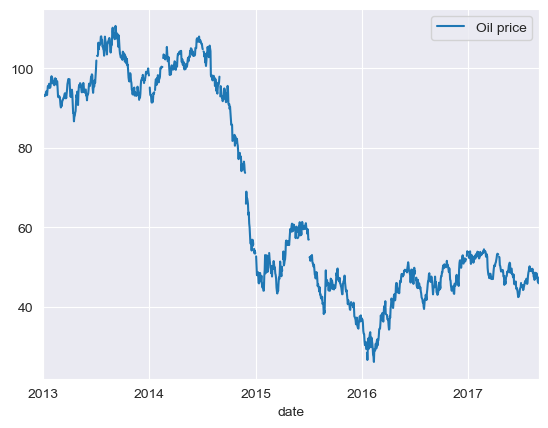

In [73]:
oil.astype({"date":"datetime64"}).plot(x="date");

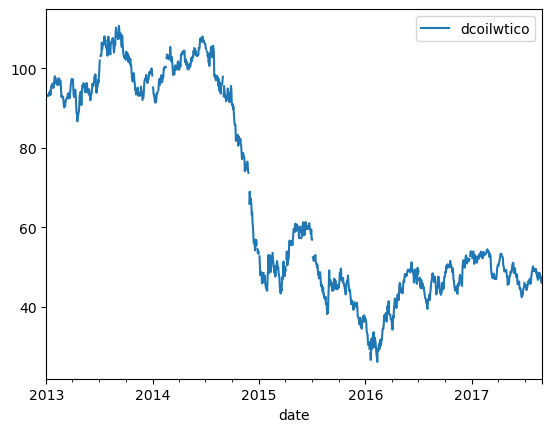

In [7]:
oil.astype({"date":"datetime64"}).set_index("date").plot();

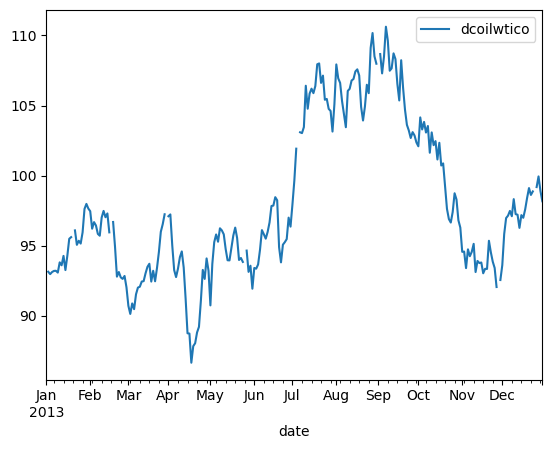

In [8]:
oil.astype({"date":"datetime64"}).set_index("date").loc["2013"].plot();

#using set_index gives you the flexibility of using loc function to access the desired year while with plot it shows an error.

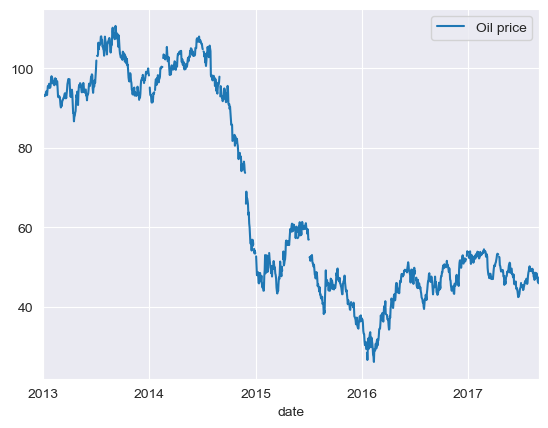

In [74]:
oil.astype({"date":"datetime64"}).set_index("date").loc["2013":].plot();

# Assignment 2: Upgraded Line Chart


Give your chart a style, add axis titles, and change the color of the line to black. 

Consider converting the date column to datetime64.

Rename the column to a more intuitive name for the audience.

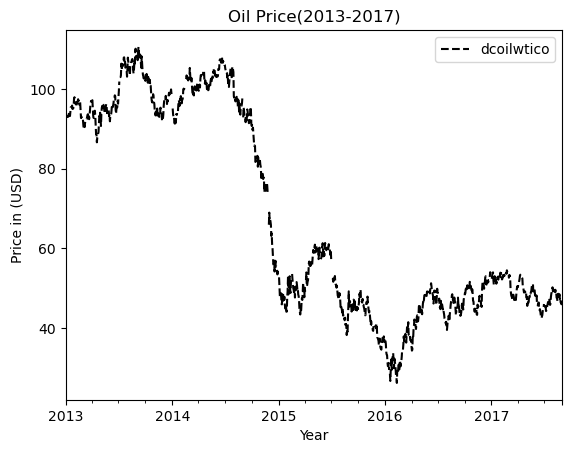

In [10]:
oil.astype({"date":"datetime64"}).set_index("date").loc["2013":].plot(
    title = "Oil Price(2013-2017)",
    xlabel = "Year",
    ylabel = "Price in (USD)",
    style = "--",
    color = "black"
);

In [11]:
import seaborn as sns

sns.set_style("darkgrid")

In [12]:
oil = oil.rename(columns={"dcoilwtico":"Oil price"})

oil.head()

,date,Oil price
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


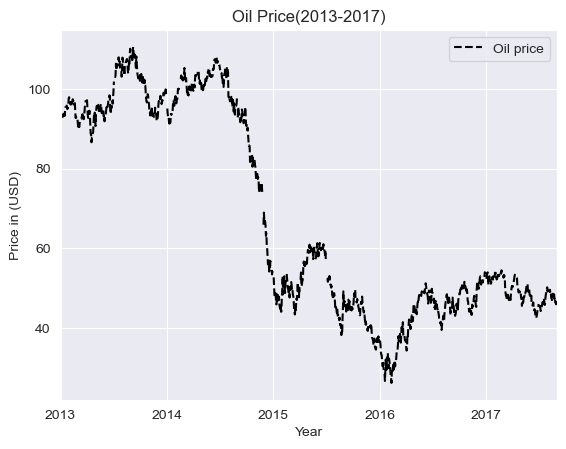

In [13]:
oil.set_index(oil["date"].astype("datetime64")).plot(
    title = "Oil Price(2013-2017)",
    xlabel = "Year",
    ylabel = "Price in (USD)",
    style = "--",
    color = "black"
);

# Assignment 3: Subplots

Filter the transactions table to stores 1, 2, 3 and 4, then reshape it so each row is a date, and the columns of the table are the transactions for each store. 

Once you've done that, create a 2x2 line plot of transactions vs time, with one plot for each store.

Thanks!

In [14]:
transactions = pd.read_csv("../retail/transactions.csv")

transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [15]:
store_1234 = (
    transactions.loc[transactions["store_nbr"].isin([1,2,3,4])]
    .pivot_table(index="date", columns="store_nbr")
    .droplevel(0, axis=1)
)

store_1234

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


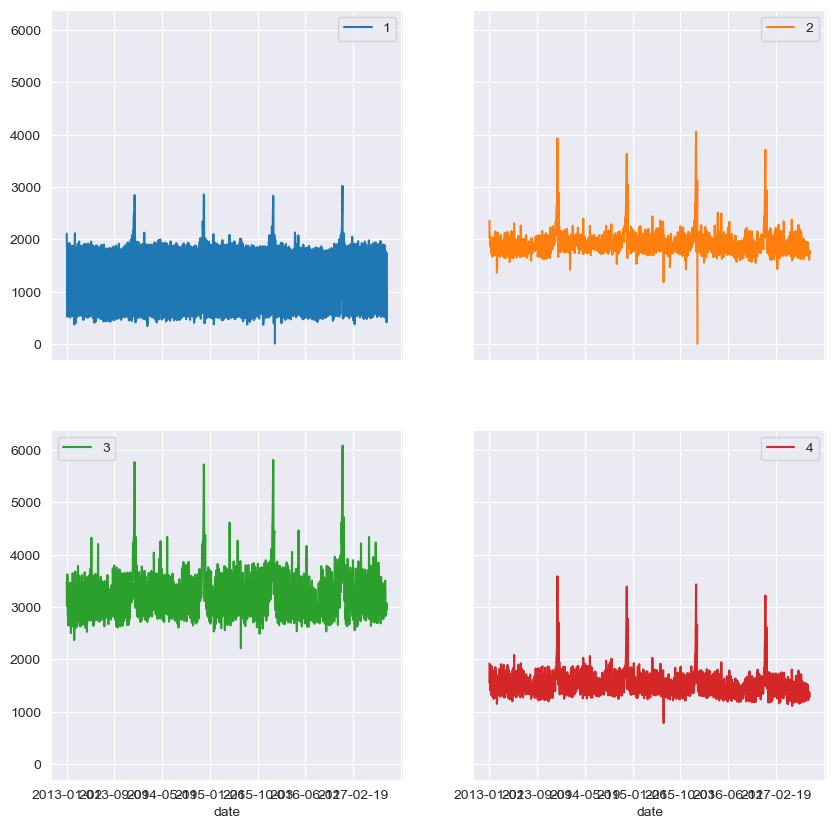

In [16]:
store_1234.plot(subplots=True,
                 layout = (2,2),
                 figsize=(10,10),
                 sharey =True);

# Assignment 4: Bar Charts

Create a sorted Bar chart of total sales by store number for stores 1, 2, 3 and 4.

Then create a horizontal stacked bar chart of sales by month, stacked by store number. 

In [17]:
# convert dates to datetime64

store_1234.index = store_1234.index.astype("datetime64[ns]") 

store_1234

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


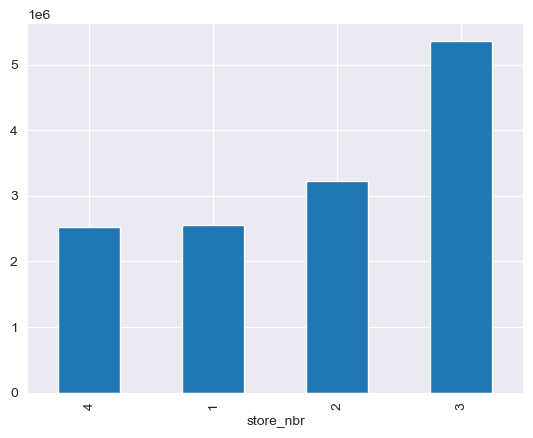

In [18]:
store_1234.sum().sort_values(ascending=True).plot.bar();

In [19]:
# stores_1234.index.month will allow you to groupby the month! You can also slice it.

store_1234_month = store_1234.groupby(store_1234.index.month).sum()

store_1234_month

store_nbr,1,2,3,4
date,,,,
1,229203.0,284134.0,463260.0,222075.0
2,209400.0,265922.0,437238.0,209211.0
3,232178.0,293076.0,487224.0,231837.0
4,229081.0,287325.0,478308.0,223928.0
5,231160.0,293588.0,491961.0,228753.0
6,231514.0,284835.0,474668.0,222678.0
7,236032.0,288783.0,484698.0,224327.0
8,202821.0,255475.0,431752.0,200100.0
9,182035.0,228658.0,379101.0,178172.0


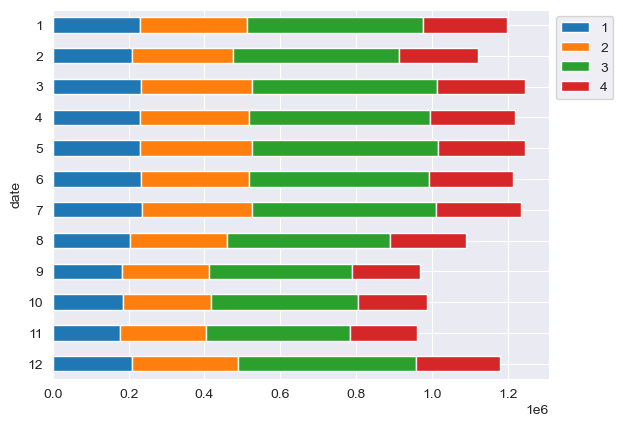

In [20]:
store_1234_month.sort_index(ascending=False).plot.barh(stacked=True).legend(bbox_to_anchor=(1,1));

# Assignment 5: Scatterplots

Plot the relationship between store 2 and store 3 sales.

Color the dots by month.

Use `c=stores_1234.index.month` to do so.

In [29]:
store_1234.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


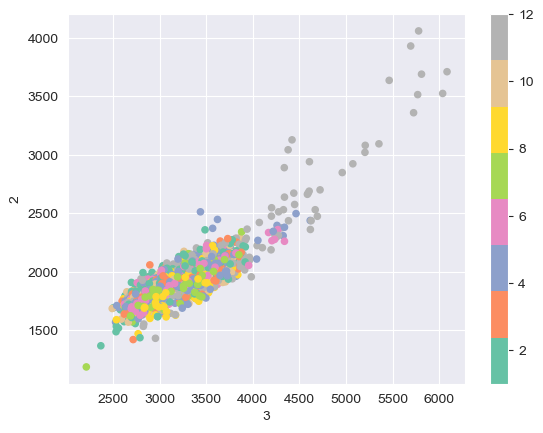

In [31]:
store_1234.plot.scatter(x=3, y=2, c=store_1234.index.month, cmap="Set2");

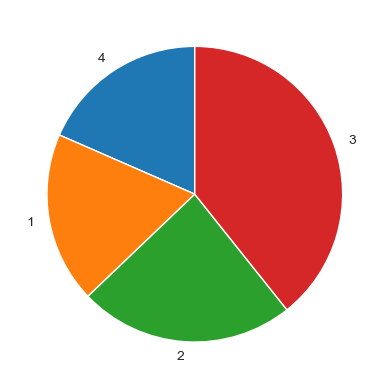

In [45]:
store_1234.sum().sort_values(ascending=True).plot.pie(startangle = 90);

# Assignment 6: Histograms

Hi there,

Can you plot the distributions of sales for stores 2 and 3?

I want to see how often store 2 has sales similar to store 3, as well as if there are any outlier type days.

Thanks!


In [46]:
store_1234.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


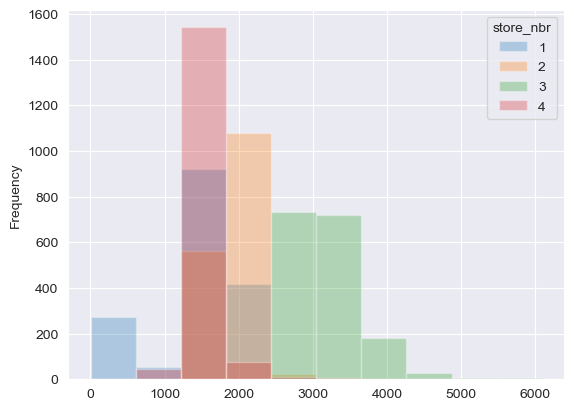

In [51]:
store_1234.plot.hist(alpha=0.3);

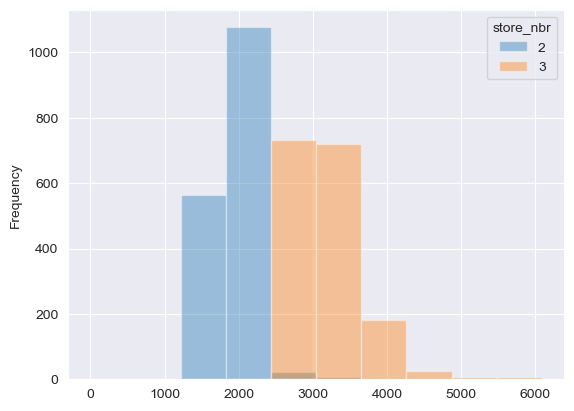

In [60]:
store_1234.loc[:, [2,3]].plot.hist(alpha=0.4)

# How to save It As An Image

plt.savefig("store_2_store_3_hist.png", bbox_inches="tight");